In [29]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [69]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
123,999,36,69,190,False
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True


In [70]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
False,123
True,108
False,136
False,138
False,132
False,120
True,143


In [71]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,742
True,484


/opt/anaconda3/lib/python3.7/site-packages/datascience/tables.py:496: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


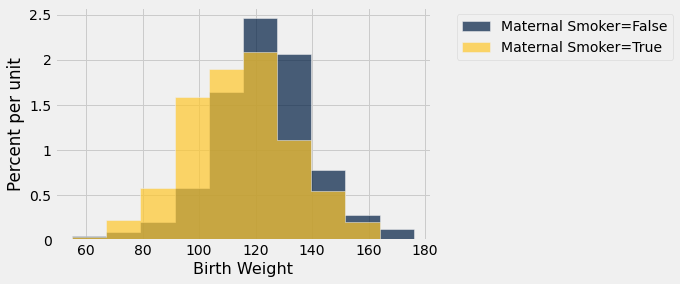

In [72]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [73]:
means_tb1 = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_tb1

Maternal Smoker,Birth Weight average
False,123.047
True,114.11


In [74]:
means = means_tb1.column(1)
observed_difference = means.item(0) - means.item(1)
observed_difference

8.93766567908935

In [75]:
weights = smoking_and_birthweight.select('Birth Weight')
weights

Birth Weight
120
113
128
123
108
136
138
132
120
143


In [76]:
weights.sample(with_replacement = False)

Birth Weight
121
122
122
99
127
127
123
130
138
101


In [77]:
shuffled_weights = weights.sample(with_replacement = False).column(0)

In [78]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Birth Weight', shuffled_weights
)

In [79]:
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Birth Weight
False,120,136
False,113,120
True,128,121
False,123,115
True,108,112
False,136,110
False,138,115
False,132,115
False,120,107
True,143,123


In [80]:
original_and_shuffled.group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average,Shuffled Birth Weight average
False,123.047,119.515
True,114.11,119.525


In [81]:
group_labels = baby.select('Maternal Smoker')
group_labels

Maternal Smoker
False
False
True
False
True
False
False
False
False
True


In [82]:
# array of shuffled weights

# table with shuffled weigths assigned to group Labels

# array of meas of the two groups

# difference between means of the two groups



In [94]:
shuffled_weights = weights.sample(with_replacement = False).column(0)
shuffled_tb1 = group_labels.with_column('Shuffled Weight', shuffled_weights)
means = shuffled_tb1.group('Maternal Smoker', np.average).column(1)
new_difference = means.item(0) - means.item(1)
new_difference

-0.4913178588135736

In [96]:
differences = make_array()

for i in np.arange(5000):
    shuffled_weights = weights.sample(with_replacement = False).column(0)
    shuffled_tb1 = group_labels.with_column('Shuffled Weight', shuffled_weights)
    means = shuffled_tb1.group('Maternal Smoker', np.average).column(1)
    new_difference = means.item(0) - means.item(1)
    differences = np.append(differences, new_difference)

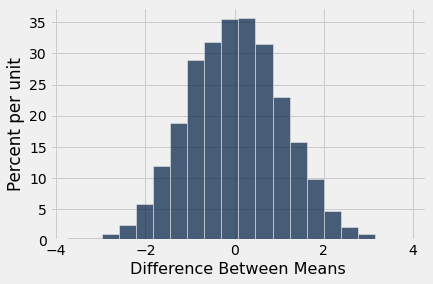

In [97]:
Table().with_column('Difference Between Means', differences).hist(bins = 20)

In [98]:
observed_difference

8.93766567908935